In [2]:
pip install netCDF4

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install xarray

Note: you may need to restart the kernel to use updated packages.


In [18]:
import netCDF4
import numpy as np
import pandas as pd
import requests
import urllib
import os
import logging
from pathlib import Path
import xarray as xr
import matplotlib.pyplot as plt




In [6]:
def read_nc_file(year):
    try:
        #reads the file 
        file_name = f'hgt.{year}.nc'
        cwd = 'c:/Users/maxym/DSC180/replication_project/code/Replication_Project'
        file_path = f'{cwd}/src/data/{file_name}'
        ds = xr.open_dataset(file_path)
        df = ds.to_dataframe()
        #print(df.head())
        #f = netCDF4.Dataset(file_path)
        print(f'Successfully read data from {year}.')
        return df
    except:
        print(f'Unexpected error while reading data from {year}.')


def get_500_df(year):
    try:
        df = read_nc_file(year)
        df = df.reset_index()
        df_500 = df[df['hgt'] == 500]
        print(f'Successfully got 500 mb data from {year}.')
        return df_500
    except:
        print(f'Unexpected error while getting 500 mb data from {year}.')
get_500_df(1950)

Successfully read data from 1950.
Successfully got 500 mb data from 1950.


,level,lat,lon,time,hgt
3432311,1000.0,-72.5,107.5,1950-08-05,500.0
3436690,1000.0,-72.5,137.5,1950-08-04,500.0
3474257,1000.0,-75.0,35.0,1950-07-07,500.0
3483669,1000.0,-75.0,100.0,1950-04-20,500.0
3485568,1000.0,-75.0,112.5,1950-07-03,500.0
...,...,...,...,...,...
7581778,925.0,-87.5,87.5,1950-12-30,500.0
7584330,925.0,-87.5,105.0,1950-12-27,500.0
7593256,925.0,-87.5,167.5,1950-06-11,500.0
7610975,925.0,-87.5,287.5,1950-12-27,500.0


In [4]:
df = df.reset_index()
df_500 = df[df['hgt'] == 500]
df_500

,level,lat,lon,time,hgt
3441316,1000.0,-72.5,105.0,1948-07-03,500.0
3484558,1000.0,-75.0,40.0,1948-08-26,500.0
3492570,1000.0,-75.0,95.0,1948-07-17,500.0
3492874,1000.0,-75.0,97.5,1948-05-16,500.0
3493256,1000.0,-75.0,100.0,1948-06-01,500.0
...,...,...,...,...,...
7634404,925.0,-87.5,307.5,1948-01-11,500.0
7634770,925.0,-87.5,310.0,1948-01-11,500.0
7635136,925.0,-87.5,312.5,1948-01-11,500.0
7641358,925.0,-87.5,355.0,1948-01-11,500.0


In [13]:
coords = list(df_500.groupby(['lat','lon']).count().index)
coords

[(-87.5, 0.0),
 (-87.5, 2.5),
 (-87.5, 7.5),
 (-87.5, 12.5),
 (-87.5, 22.5),
 (-87.5, 27.5),
 (-87.5, 35.0),
 (-87.5, 42.5),
 (-87.5, 45.0),
 (-87.5, 50.0),
 (-87.5, 52.5),
 (-87.5, 55.0),
 (-87.5, 57.5),
 (-87.5, 60.0),
 (-87.5, 62.5),
 (-87.5, 67.5),
 (-87.5, 70.0),
 (-87.5, 72.5),
 (-87.5, 77.5),
 (-87.5, 82.5),
 (-87.5, 90.0),
 (-87.5, 97.5),
 (-87.5, 102.5),
 (-87.5, 107.5),
 (-87.5, 112.5),
 (-87.5, 122.5),
 (-87.5, 247.5),
 (-87.5, 307.5),
 (-87.5, 310.0),
 (-87.5, 312.5),
 (-87.5, 355.0),
 (-87.5, 357.5),
 (-85.0, 15.0),
 (-85.0, 17.5),
 (-85.0, 20.0),
 (-85.0, 25.0),
 (-85.0, 37.5),
 (-85.0, 47.5),
 (-85.0, 52.5),
 (-85.0, 55.0),
 (-85.0, 57.5),
 (-85.0, 60.0),
 (-85.0, 62.5),
 (-85.0, 67.5),
 (-85.0, 82.5),
 (-85.0, 87.5),
 (-85.0, 92.5),
 (-85.0, 100.0),
 (-85.0, 102.5),
 (-85.0, 107.5),
 (-85.0, 112.5),
 (-85.0, 165.0),
 (-85.0, 167.5),
 (-85.0, 170.0),
 (-85.0, 197.5),
 (-85.0, 205.0),
 (-85.0, 215.0),
 (-85.0, 225.0),
 (-85.0, 227.5),
 (-85.0, 237.5),
 (-85.0, 257.5),
 (-

In [16]:
coord_df = pd.DataFrame(coords).rename(columns={0:'lat',1:'long'})
coord_df

,lat,long
0,-87.5,0.0
1,-87.5,2.5
2,-87.5,7.5
3,-87.5,12.5
4,-87.5,22.5
...,...,...
1256,87.5,7.5
1257,87.5,10.0
1258,87.5,135.0
1259,87.5,242.5


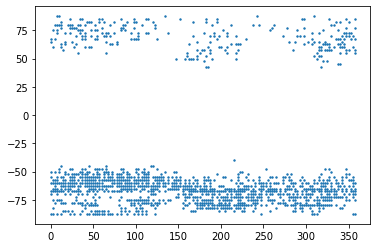

In [27]:
plt.scatter(coord_df['long'],coord_df['lat'],s=2)

In [24]:
coord_df['long'].max()

357.5

In [6]:
hgt = f.variables['hgt'] # hgt variable
print(hgt)

<class 'netCDF4._netCDF4.Variable'>
float32 hgt(time, level, lat, lon)
    long_name: mean Daily Geopotential height
    units: m
    precision: 0
    least_significant_digit: 0
    GRIB_id: 7
    GRIB_name: HGT
    var_desc: Geopotential height
    dataset: NCEP Reanalysis Daily Averages
    level_desc: Multiple levels
    statistic: Mean
    parent_stat: Individual Obs
    missing_value: -9.96921e+36
    actual_range: [ -470. 32092.]
    valid_range: [ -700. 35000.]
unlimited dimensions: time
current shape = (366, 17, 73, 144)
filling on, default _FillValue of 9.969209968386869e+36 used
